In [1]:
import nibabel as nib
import cv2 as cv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.mkdir('Dataset_Padronizado')

In [3]:
diretorio_final = os.path.join(os.getcwd(),'Dataset_Padronizado')

In [30]:
df = pd.read_csv('metadados_reorganizado')

In [31]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...
706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [6]:
df['Morbidity'].value_counts()

Regula/Mild              364
Severe/Critically ill    157
Control                  136
Suspected                 54
Name: Morbidity, dtype: int64

In [7]:
path_imgs = df['Caminho'].values.tolist()

In [8]:
nomes_pat = df['Patient'].values.tolist()

In [9]:
nomes_pat

['Patient 1',
 'Patient 2',
 'Patient 3',
 'Patient 4',
 'Patient 5',
 'Patient 6',
 'Patient 10',
 'Patient 11',
 'Patient 12',
 'Patient 13',
 'Patient 15',
 'Patient 16',
 'Patient 17',
 'Patient 18',
 'Patient 20',
 'Patient 22',
 'Patient 23',
 'Patient 24',
 'Patient 25',
 'Patient 26',
 'Patient 27',
 'Patient 28',
 'Patient 30',
 'Patient 32',
 'Patient 33',
 'Patient 34',
 'Patient 35',
 'Patient 36',
 'Patient 37',
 'Patient 38',
 'Patient 39',
 'Patient 40',
 'Patient 41',
 'Patient 42',
 'Patient 44',
 'Patient 45',
 'Patient 46',
 'Patient 47',
 'Patient 48',
 'Patient 49',
 'Patient 50',
 'Patient 51',
 'Patient 52',
 'Patient 53',
 'Patient 54',
 'Patient 55',
 'Patient 56',
 'Patient 57',
 'Patient 58',
 'Patient 61',
 'Patient 62',
 'Patient 63',
 'Patient 64',
 'Patient 65',
 'Patient 67',
 'Patient 68',
 'Patient 69',
 'Patient 70',
 'Patient 71',
 'Patient 72',
 'Patient 73',
 'Patient 74',
 'Patient 75',
 'Patient 76',
 'Patient 77',
 'Patient 78',
 'Patient 79',
 

In [10]:
path_imgs

['/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 1.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 2.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 3.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 4.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 5.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 6.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 10.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 11.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 12.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 13.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 15.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 16.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 1

In [11]:
teste = nib.load(path_imgs[0])

In [12]:
teste.get_fdata().shape

(181, 512, 512, 1)

In [13]:
def padroniza(ct,min):
    inicio = ct.shape[0] - min
    ct_padronizado = ct.get_fdata()[inicio:,:,:,:]
    
    return ct_padronizado

In [14]:
#descobrindo a fatia minima
qt_fatias =  []
for arq in path_imgs:
    ct = nib.load(arq)
    qt_fatias.append(ct.get_fdata().shape[0])

In [32]:
qt_fatias

[181,
 66,
 405,
 70,
 65,
 54,
 69,
 308,
 61,
 419,
 419,
 186,
 291,
 471,
 132,
 151,
 379,
 213,
 194,
 63,
 60,
 64,
 175,
 445,
 63,
 445,
 63,
 67,
 452,
 379,
 66,
 219,
 268,
 60,
 161,
 244,
 231,
 63,
 288,
 305,
 169,
 153,
 248,
 405,
 173,
 58,
 154,
 252,
 171,
 68,
 141,
 60,
 67,
 399,
 294,
 376,
 59,
 59,
 214,
 252,
 494,
 284,
 439,
 433,
 379,
 155,
 486,
 64,
 51,
 62,
 165,
 171,
 65,
 174,
 52,
 151,
 54,
 73,
 162,
 453,
 213,
 224,
 58,
 236,
 173,
 63,
 174,
 166,
 178,
 75,
 379,
 59,
 473,
 60,
 70,
 68,
 432,
 276,
 268,
 288,
 70,
 66,
 460,
 135,
 459,
 425,
 419,
 413,
 484,
 156,
 63,
 78,
 404,
 72,
 427,
 160,
 134,
 479,
 232,
 425,
 328,
 63,
 345,
 232,
 410,
 70,
 373,
 445,
 379,
 385,
 439,
 247,
 71,
 240,
 339,
 154,
 172,
 163,
 519,
 405,
 72,
 476,
 56,
 466,
 512,
 399,
 379,
 268,
 268,
 71,
 308,
 399,
 459,
 186,
 444,
 154,
 452,
 251,
 192,
 379,
 72,
 441,
 399,
 363,
 505,
 400,
 493,
 405,
 409,
 369,
 426,
 480,
 379,
 380,
 43

In [33]:
min(qt_fatias)

51

In [34]:
df['Qt_fatias'] = qt_fatias

In [35]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181
1,1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,66
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405
3,3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,70
4,4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,65
...,...,...,...,...,...,...,...,...,...,...,...,...
706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264
707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258
708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270
709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252


<AxesSubplot:>

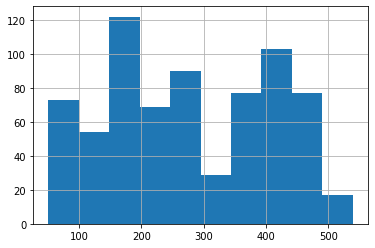

In [36]:
df['Qt_fatias'].hist()

In [37]:
df['Qt_fatias'].mean()

277.61462728551334

In [38]:
df_ana = df[df['Qt_fatias'] <150]

In [39]:
df_ana['Morbidity'].value_counts()

Regula/Mild              95
Severe/Critically ill    17
Control                  10
Suspected                 8
Name: Morbidity, dtype: int64

In [40]:
df.drop(df[df['Qt_fatias'] <150].index,inplace=True)

In [41]:
minimo = df['Qt_fatias'].min()

In [42]:
df['Morbidity'].value_counts()

Regula/Mild              269
Severe/Critically ill    140
Control                  126
Suspected                 46
Name: Morbidity, dtype: int64

In [43]:
df.drop(df[df['Morbidity']=='Control'].index,inplace=True)

In [44]:
df.drop(df[df['Morbidity']=='Suspected'].index,inplace=True)

In [45]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405
7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308
9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419
10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419
...,...,...,...,...,...,...,...,...,...,...,...,...
706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264
707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258
708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270
709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252


In [46]:
df['Morbidity'].value_counts()

Regula/Mild              269
Severe/Critically ill    140
Name: Morbidity, dtype: int64

In [47]:
path_imgs = df['Caminho'].values.tolist()
path_nome = df['Patient'].values.tolist()

In [48]:
for arq,nome in zip(path_imgs,path_nome):
    ct = nib.load(arq)
    ct_pad = padroniza(ct,minimo)
    new_ct = nib.Nifti1Image(ct_pad,affine=None)
    nib.save(new_ct,os.path.join(diretorio_final,nome))

In [49]:
teste = nib.load(os.path.join(diretorio_final,path_nome[1]+'.nii'))

In [50]:
teste.get_fdata().shape

(150, 512, 512, 1)

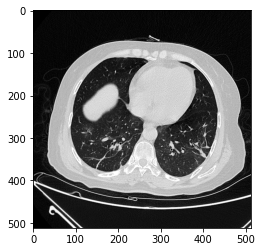

In [51]:
plt.imshow(teste.get_fdata()[10,:,:,:],cmap='gray')

In [53]:
diretorio_final

'/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado'

In [61]:
list_arq = os.listdir(diretorio_final)
caminho_padronizado = []
for arq in list_arq:
    caminho_padronizado.append(os.path.join(diretorio_final,arq))

In [55]:
caminho_padronizado

['/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1352.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 785.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1384.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 160.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1309.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1203.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 293.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 312.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1361.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1349.nii',
 '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 215

In [68]:
mapeamento = {nome[:-4]:path  for nome,path in zip(list_arq,caminho_padronizado)}

In [67]:
mapeamento

{'Patient 1352': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1352.nii',
 'Patient 785': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 785.nii',
 'Patient 1384': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1384.nii',
 'Patient 160': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 160.nii',
 'Patient 1309': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1309.nii',
 'Patient 1203': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1203.nii',
 'Patient 293': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 293.nii',
 'Patient 312': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 312.nii',
 'Patient 1361': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1361.nii',
 'Patient 1349': '/home/icaro/Faculd

In [69]:
df['Caminho_padronizado'] = df['Patient'].map(mapeamento)

In [70]:
df

,Unnamed: 0,Unnamed: 0.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias,Caminho_padronizado
0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [74]:
teste = nib.load(df['Caminho_padronizado'].iloc[0])

In [75]:
teste.get_fdata().shape

(150, 512, 512, 1)

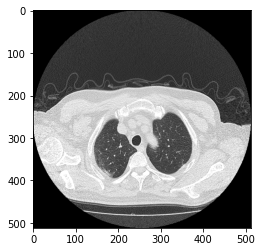

In [76]:
plt.imshow(teste.get_fdata()[10,:,:,:],cmap='gray')

In [77]:
df.to_csv('metadados_padronizados')